## Loan Default Prediction

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature.

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data\data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## Import Modules

In [ ]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np
# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# optimization package
import optuna

c:\Users\nkola\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the Data

loading the dataset `train.csv` into a dataframe `train_df`.

In [ ]:
# read data into a dataframe and display first 5 rows
train_df = pd.read_csv("data\train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


## Explore, Clean, Validate, and Visualize the Data

In [4]:
# summary statistics
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [5]:
# check for duplicates in data. If 0, there are no duplicates
train_df.duplicated().sum()

np.int64(0)

In [6]:
# check is there are missing values
train_df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [7]:
# observe distribution of target classes in training set
train_df["Default"].value_counts(normalize=True)

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

Target class is clearly imbalanced

In [8]:
# Explore measure of central tendency and dispersion of customers Income
print(f"The mean value for income is {train_df['Income'].mean():.2f}")
print(f"The median value for income is {train_df['Income'].median():.2f}")
print(f"The standard deviation for income is {train_df['Income'].std():.2f}")

The mean value for income is 82499.30
The median value for income is 82466.00
The standard deviation for income is 38963.01


The mean and median values are very close, so its safe to assume the average income is around 82466. 
The Standard deviation is high, so income levels vary widely.

In [9]:
# observe distribution
print(f"Skewness: {train_df['Income'].skew():.2f}")
print(f"Kurtosis: {train_df['Income'].kurt():.2f}")

Skewness: -0.00
Kurtosis: -1.20


The skewness is near 0 and the kurtosis is -ve, meaning the data distribution is likely uniform

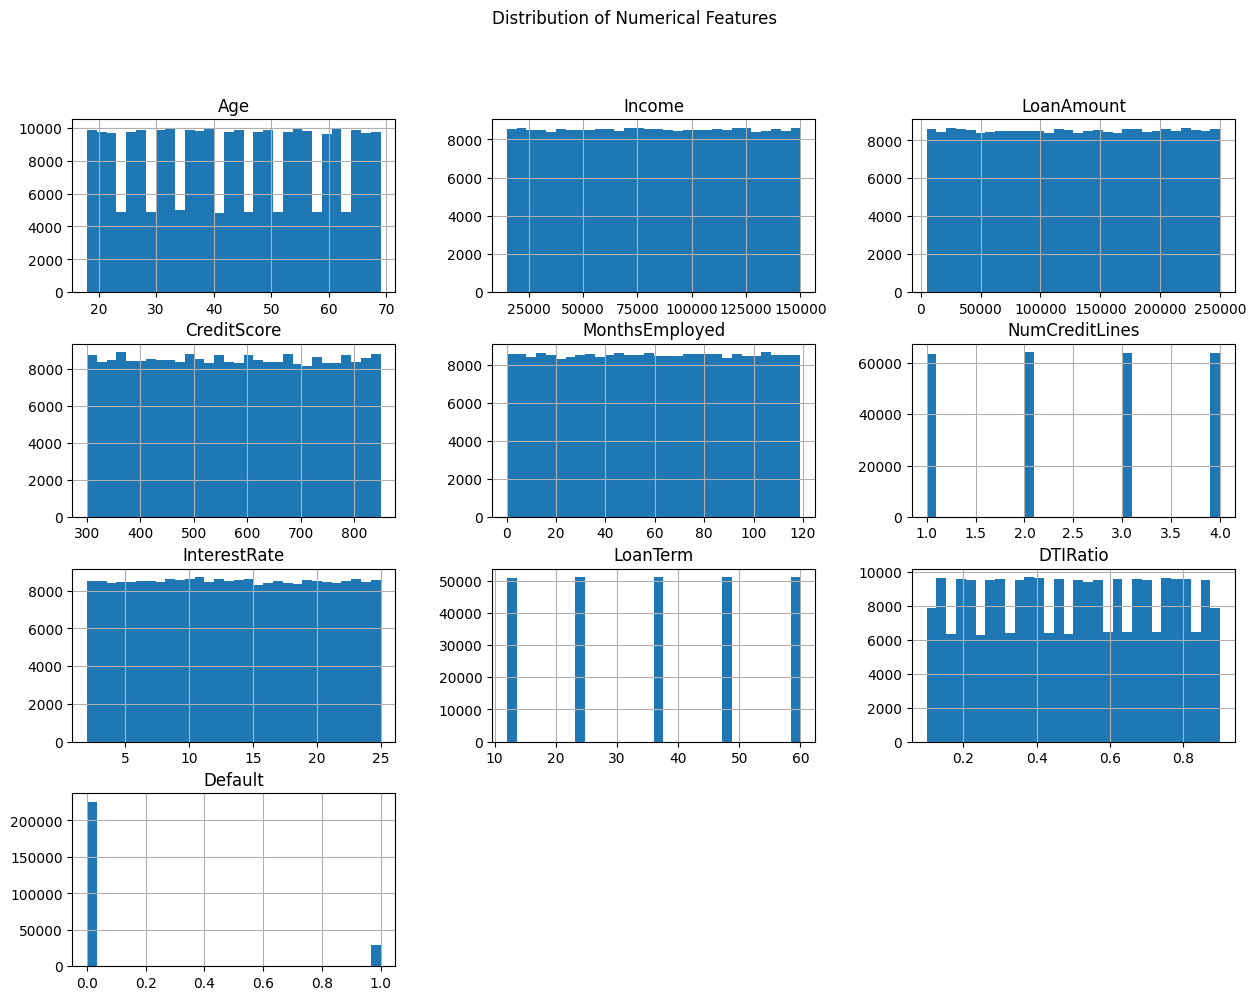

In [10]:
# Histograms for numerical features
num_cols = train_df.select_dtypes(include=np.number).columns.tolist()
train_df[num_cols].hist(figsize=(15, 11), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

- Most distributions look uniform.
- We can visualize how imbalanced target set is.

<Axes: xlabel='Income', ylabel='LoanAmount'>

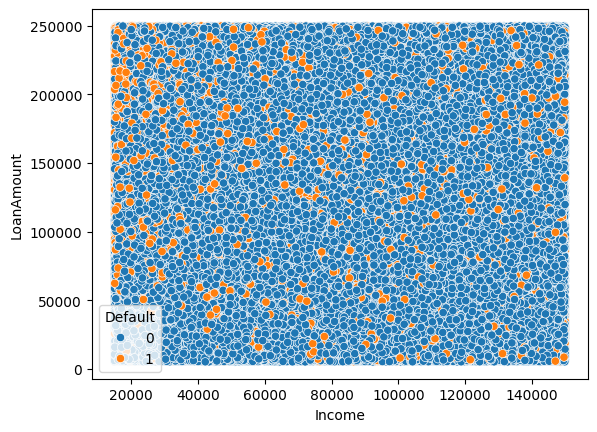

In [11]:
# Try to visualize any relationship between Income and LoanAmount using a scatterplot
sns.scatterplot(data=train_df, x="Income", y="LoanAmount", hue="Default")

Can't identify a desirable pattern here. People from different income ranges borrow from all loan ranges and defaulters are a little everywhere, though more at lower incomes

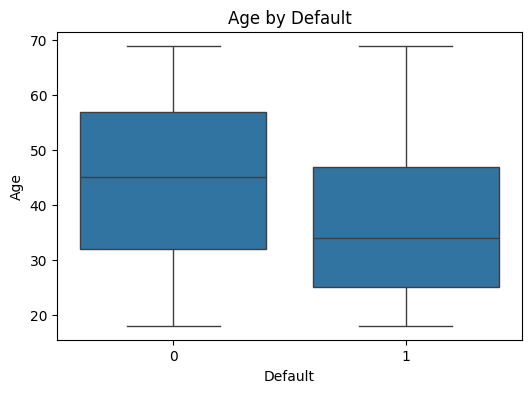

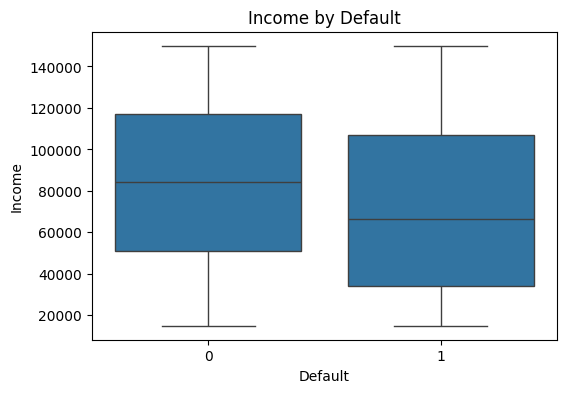

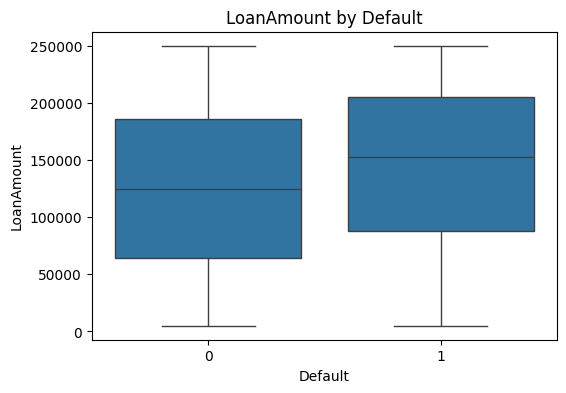

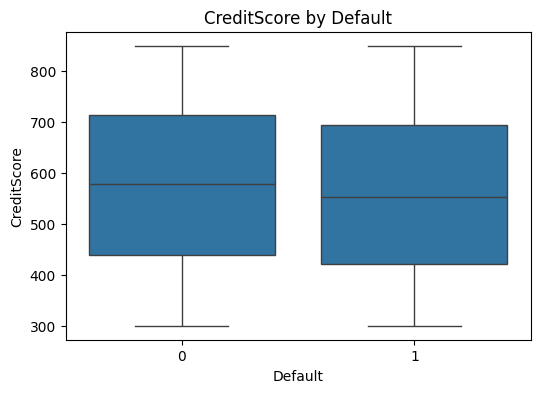

In [12]:
# Boxplots by target for a few numerical features
for col in ["Age", "Income", "LoanAmount", "CreditScore"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Default", y=col, data=train_df)
    plt.title(f"{col} by Default")
    plt.show()

- Looks like there are more defaulters at lower ages and income levels
- However there are more defaulters with higer loan amounts, which I guess is expected.
- The avaerage credit scores for defaulters and non-defaulters look quite close.

## Feature Engineering

In [13]:
# create column with loan to term ratio. Let LTT represent LoanAmount-to-LoanTerm
train_df["LTT"] = (train_df["LoanAmount"] * (1 + train_df["InterestRate"])) / (train_df["LoanTerm"] * 100)

# Debt to interest ratio (DTI) ratio with interest rates
train_df["DTI"] = (train_df["LoanAmount"] * (1 + train_df["InterestRate"])) / (train_df["Income"] * 100)

train_df["Income"] = np.log1p(train_df["Income"])

# drop loanID
train_df = train_df.drop(columns="LoanID")

### Feature Encoding

In [14]:
# create function to dummy categorical features
def encode_categorical_columns(df):
    """Encodes categorical columns in a DataFrame with numerical labels."""
    encoders = {}
    df_encoded = df.copy()
    
    for col in df.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])
        encoders[col] = le
    
    return df_encoded

In [15]:
# dummy categorical features of the dataframe
train_encoded = encode_categorical_columns(train_df)
train_encoded.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,LTT,DTI
0,56,11.362044,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0,228.063058,0.095475
1,69,10.828401,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0,120.499400,0.143361
2,46,11.341057,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1,1193.374150,0.340122
3,32,10.364514,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0,150.636638,0.114000
4,60,9.925151,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0,14.298727,0.033583


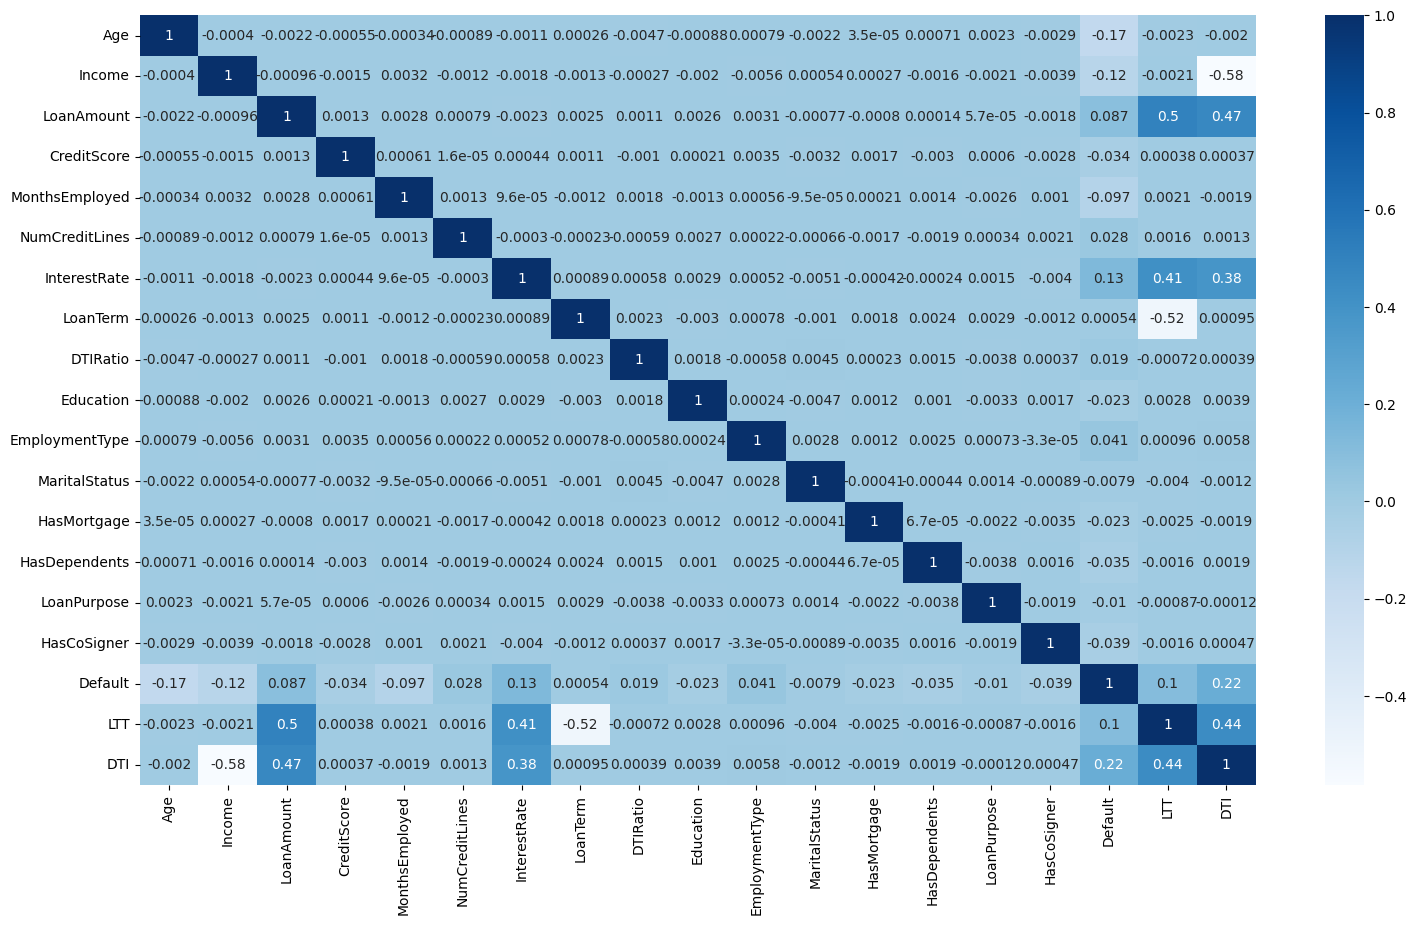

In [16]:
# Observe correlation between features
corr = train_encoded.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

- Looking at the default row, can't identify any parameters that has a high correlation with it.
- Some parameters have pretty low correlations with it, like LoanTerm, and MaritalStatus. I'll likely drop those.

In [17]:
# select target 
target = train_encoded["Default"]

# drop Default, LoanTerm and marital status columns. The correlation of loanterm and default is very low
train_encoded = train_encoded.drop(columns=["Default", "LoanTerm", "MaritalStatus"])

In [18]:
# Scale data using StandardScaler transformation
train_scaled = StandardScaler().fit_transform(train_encoded)
train_scaled

array([[ 0.83398951,  0.31948648, -1.08683299, ...,  0.99978463,
        -0.6112313 , -0.5857953 ],
       [ 1.70122109, -0.58832582, -0.04430887, ...,  0.99978463,
        -0.74996873, -0.45829603],
       [ 0.1668883 ,  0.28378366,  0.02271487, ..., -1.00021542,
         0.63384326,  0.06559511],
       ...,
       [ 0.83398951,  0.29610235,  1.13939142, ...,  0.99978463,
        -0.62374448, -0.42873077],
       [-0.09995219,  0.30188865, -0.94584033, ..., -1.00021542,
        -0.54891976, -0.42498941],
       [ 1.23425024, -1.96751817, -1.54004788, ...,  0.99978463,
        -0.7518402 , -0.67033247]], shape=(255347, 16))

In [19]:
# split data into training and validation set
x_train, x_val, y_train, y_val = train_test_split(train_scaled, target, test_size=0.2, random_state=42, stratify=target)

In [20]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((204277, 16), (204277,), (51070, 16), (51070,))

## Make predictions 

### Trial 1: Logistic Regression Model

In [21]:
# Build logistic regression model. Set class weights to balanced for imbalance dataset
LR = LogisticRegression(C=0.01, solver="liblinear", class_weight="balanced", max_iter=200)
LR.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=200,
                   solver='liblinear')

In [22]:
# make predictions
lr_pred = LR.predict(x_val)

In [23]:
# score model and display confusion matrix (simple display)
lr_score = roc_auc_score(y_val, lr_pred)
confusion_matrix(y_val, lr_pred)

array([[30961, 14178],
       [ 1814,  4117]])

### Trial 2: Decision Tree Model

In [24]:
# build decision tree classifier
DT = DecisionTreeClassifier(criterion="entropy", random_state=42, class_weight="balanced", max_depth=6)
DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, random_state=42)

In [25]:
# make predictions
dt_pred = DT.predict(x_val)

# score model and display confusion matrix
dt_score = roc_auc_score(y_val, dt_pred)
confusion_matrix(y_val, dt_pred)

array([[30312, 14827],
       [ 1907,  4024]])

### Trial 3: Random Forest Model

In [26]:
# build random forest model
RF = RandomForestClassifier(class_weight="balanced", random_state=42, criterion="entropy", max_depth=8)
RF.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, random_state=42)

In [27]:
# make predictions
rf_ypred = RF.predict(x_val)

# score model and display confusion matrix
rf_score = roc_auc_score(y_val, rf_ypred)
confusion_matrix(y_val, rf_ypred)

array([[32353, 12786],
       [ 2063,  3868]])

### Trial 4: SVM model

In [28]:
# build linear svm model for faster computing
SV = svm.LinearSVC(class_weight="balanced", random_state=42, loss="squared_hinge", fit_intercept=False)
SV.fit(x_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, random_state=42)

In [29]:
# make predictions
svm_pred = SV.predict(x_val)

svm_score = roc_auc_score(y_val, svm_pred)
confusion_matrix(y_val, svm_pred)

array([[24812, 20327],
       [ 1167,  4764]])

### Trial 5: Lightgbm

In [30]:
features = list(train_encoded.columns)

In [31]:
# calculate ratio of majority class to minority class for balance parameter of lgb model 
weight = y_train.value_counts()[0]/ y_train.value_counts()[1]

# create lightgbm dataset objects
train_data = lgb.Dataset(x_train, label=y_train, feature_name=features)
val_data = lgb.Dataset(x_val, label=y_val, reference=train_data)

In [32]:
# set parameters
params = {
    "objective": "binary",          # for binary classification
    "boosting_type": "gbdt",        # gradient boosting decision tree
    "metric": "auc",
    "learning_rate": 0.05,
    "num_leaves": 64,
    "max_depth": -1,                # no limit to tree depth
    "feature_fraction": 0.9,
    "scale_pos_weight": weight,
    "verbose":-1
}

# train with validation
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    valid_names=["train", "valid"],
    num_boost_round=500,
    callbacks=[lgb.early_stopping(stopping_rounds=20)]
)

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[104]	train's auc: 0.788039	valid's auc: 0.755942


In [33]:
lgb_score = lgb_model.best_score["valid"]["auc"]

Looks like the SVM model catches the most defaulters. Though it doesn't do a good job with non-defaulters.

In [34]:
# display every model's performance
scores = {"Model name": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "lgb_model"], 
           "Score": [lr_score, dt_score, rf_score, svm_score, lgb_score]}
results = pd.DataFrame(data=scores)
results

,Model name,Score
0,Logistic Regression,0.690026
1,Decision Tree,0.674997
2,Random Forest,0.684454
3,SVM,0.676459
4,lgb_model,0.755942


LightGBM has the highest roc_auc_score. Will attempt hyper parameter optimization with it to try and achieve better results

## Visualize confusion matrix and Classification report


Confusion Matrix:


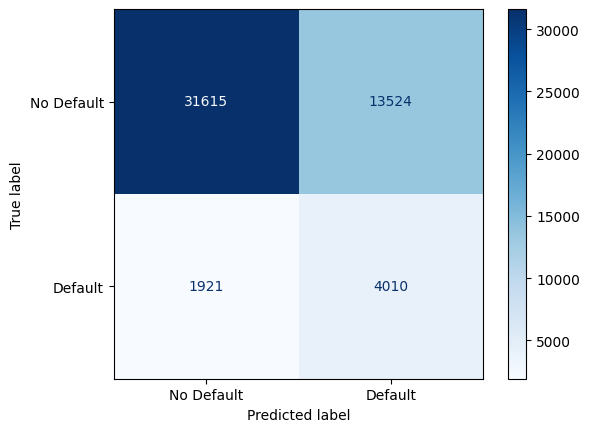

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     45139
           1       0.23      0.68      0.34      5931

    accuracy                           0.70     51070
   macro avg       0.59      0.69      0.57     51070
weighted avg       0.86      0.70      0.75     51070



In [35]:
lgb_prob = lgb_model.predict(x_val) # return probabilities
lgb_pred = (lgb_prob >= 0.5).astype(int) # get classes

cm = confusion_matrix(y_val, lgb_pred)
print(f"\nConfusion Matrix:")
ConfusionMatrixDisplay(cm, display_labels=["No Default", "Default"]).plot(cmap="Blues")
plt.show()
print(f"Classification Report:")
print(classification_report(y_val, lgb_pred))

## Most Important Features for Classification

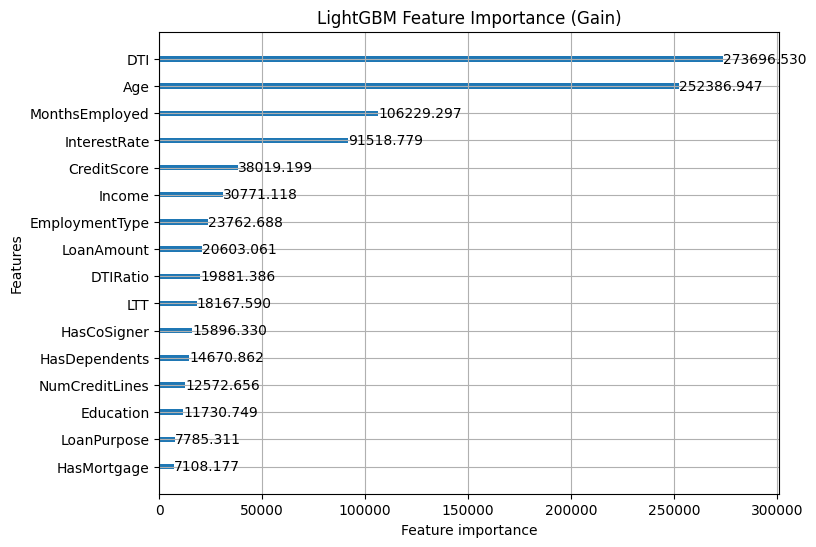

In [ ]:
# display feature importance by gain
lgb.plot_importance(lgb_model, importance_type="gain", figsize=(8,6),
                    title="LightGBM Feature Importance (Gain)")
plt.show()

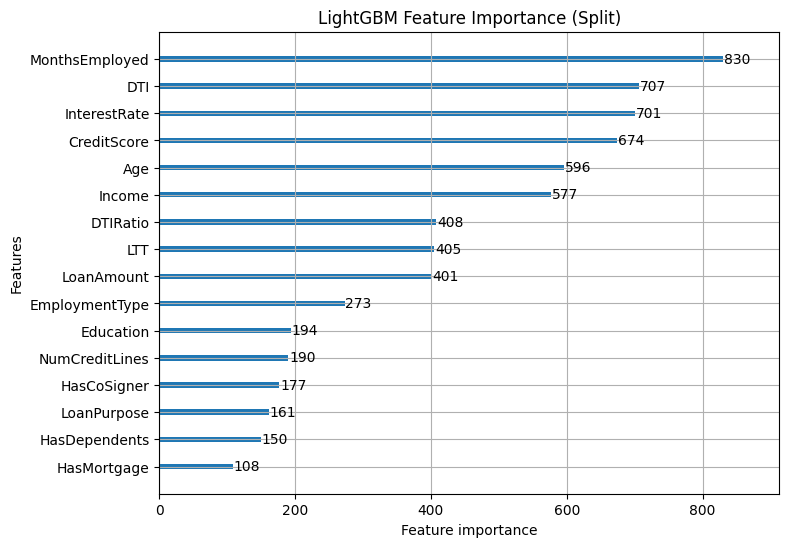

In [ ]:
# display feature importance by split (number of times used for splitting)
lgb.plot_importance(lgb_model, importance_type="split", figsize=(8,6),
                    title="LightGBM Feature Importance (Split)")
plt.show()

- The `Debt to Interest ratio (DTI)` provided the most information gain in splits, however, the feature `MonthsEmployed` was used more for splits.
- Looking at the gain plot, the next most important feature is `Age` (We caught a glimpse of this whie doing EDA) and the least important is `HasMortgage`.
- The feature `HasMortgage` is also used the least for splits.

## Hyper Parameter Optimization

Using LightGBM

In [38]:
# convert Object types to Categorical
for col in train_df.select_dtypes(include="object").columns:
    train_df[col] = train_df[col].astype("category")


# split data from original dataset
Y = train_df["Default"]
X = train_df.drop(columns="Default")
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((204277, 18), (204277,), (51070, 18), (51070,))

In [39]:
# Define objective function
def objective(trial):

    # define search space
    params = {
        "objective": "binary",
        "boosting_type": "gbdt",
        "metric": "auc",
        "verbose": -1,
        "scale_pos_weight": weight,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256, step=8),
        "max_depth": trial.suggest_int("max_depth", -1, 20),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.6, 1.0)
    }

    # Dataset objects
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

    # Train model
    gbm = lgb.train(
        params,
        train_data,
        valid_sets=[val_data],
        num_boost_round=1000,
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
    )

    # Predict on validation set
    y_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
    score = roc_auc_score(y_val, y_pred)

    return score

In [40]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Run optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # try 50 parameter sets

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.75511
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.757275
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[389]	valid_0's auc: 0.759159
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[254]	valid_0's auc: 0.759285
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[263]	valid_0's auc: 0.759779
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.753564
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[261]	valid_0's auc: 0.75593
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.75564

In [41]:
print("Best trial:")
trial = study.best_trial
print("  ROC-AUC:", trial.value)
print("  Params:", trial.params)

Best trial:
  ROC-AUC: 0.7598001719778189
  Params: {'learning_rate': 0.032864285785994936, 'num_leaves': 176, 'max_depth': 3, 'feature_fraction': 0.7618615665053283, 'bagging_fraction': 0.9390213480005803}


Couldn't get a big improvement from the search based on the search space defined.

In [42]:
# Train final model on (train+val) with best params
best_params = trial.params
best_params.update({"objective": "binary", "metric": "auc", "boosting_type": "gbdt", "verbosity": -1}) # add to params

train_data = lgb.Dataset(X, label=Y)
final_model = lgb.train(
    best_params,
    train_data,
    num_boost_round=1000
)

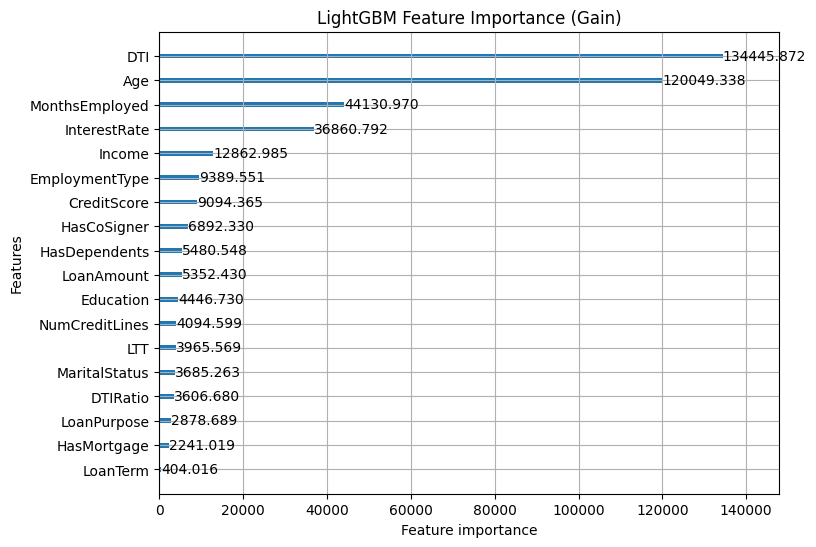

In [43]:
# visualize plot of most important features by gain
lgb.plot_importance(final_model, importance_type="gain", figsize=(8,6),
                    title="LightGBM Feature Importance (Gain)")
plt.show()

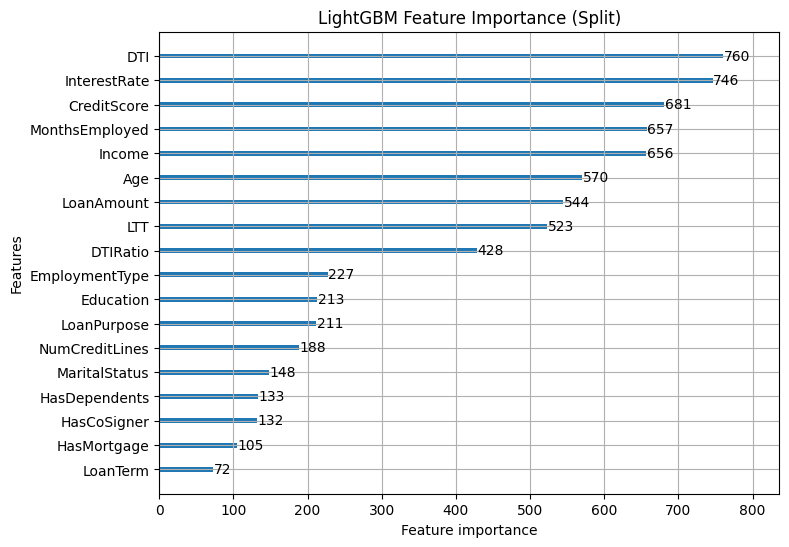

In [44]:
# visualize plot of most important features by split
lgb.plot_importance(final_model, importance_type="split", figsize=(8,6),
                    title="LightGBM Feature Importance (Split)")
plt.show()

- `DTI` remains the most important for information gain, followed by `Age`, and the least important is `LoanTerm` (This looked obvious from the correlation matrix)
- `DTI` is also the most used feature for splitting and `LoanTerm` the least.